In [19]:
!kaggle datasets download -d feyzazkefe/trashnet

Dataset URL: https://www.kaggle.com/datasets/feyzazkefe/trashnet
License(s): unknown
trashnet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
import zipfile
zip = zipfile.ZipFile('trashnet.zip')
zip.extractall()
zip.close()

In [21]:
pip install tensorflow==2.7.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.7.0


In [22]:
import os
for dirname, directories, files in os.walk('dataset-resized'):
  print (dirname, (directories), len(files))

dataset-resized ['metal', 'plastic', 'paper', 'trash', 'cardboard', 'glass'] 0
dataset-resized/metal [] 410
dataset-resized/plastic [] 482
dataset-resized/paper [] 594
dataset-resized/trash [] 137
dataset-resized/cardboard [] 403
dataset-resized/glass [] 501


In [23]:
import random
import matplotlib.pyplot as plt
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = plt.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)

  return img


array([[[198, 168, 140],
        [198, 168, 140],
        [198, 168, 140],
        ...,
        [119, 102,  86],
        [120, 103,  87],
        [121, 104,  88]],

       [[204, 174, 146],
        [204, 174, 146],
        [203, 173, 145],
        ...,
        [120, 103,  87],
        [121, 104,  88],
        [121, 104,  88]],

       [[202, 172, 144],
        [204, 174, 146],
        [205, 175, 147],
        ...,
        [121, 104,  88],
        [121, 104,  88],
        [121, 104,  88]],

       ...,

       [[246, 207, 176],
        [246, 207, 176],
        [246, 207, 176],
        ...,
        [215, 180, 140],
        [217, 182, 142],
        [219, 184, 144]],

       [[245, 206, 175],
        [245, 206, 175],
        [245, 206, 175],
        ...,
        [213, 178, 138],
        [215, 180, 140],
        [216, 181, 141]],

       [[244, 205, 174],
        [244, 205, 174],
        [245, 206, 175],
        ...,
        [211, 176, 136],
        [213, 178, 138],
        [214, 179, 139]]], dtype=uint8)
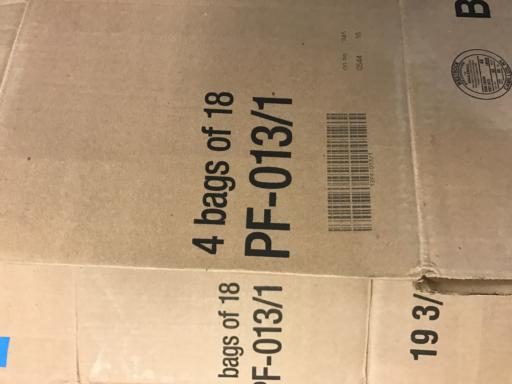

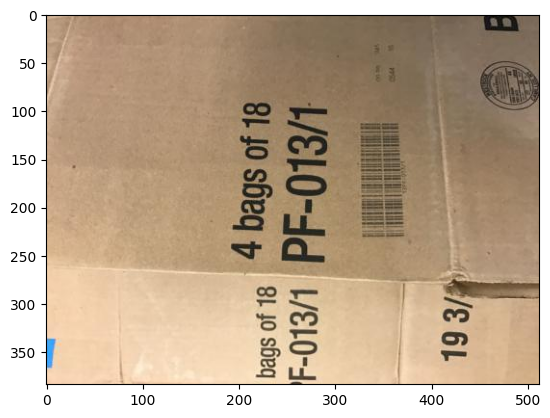

In [24]:
view_random_image('dataset-resized', 'cardboard')

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = 'dataset-resized'

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(384,512),
                                               class_mode='categorical',
                                               batch_size=32,)

Found 2527 images belonging to 6 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(384,512,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(train_data,
          epochs=10,
          steps_per_epoch=len(train_data))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 62s 530ms/step - accuracy: 0.2242 - loss: 12.4582
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 317ms/step - accuracy: 0.3835 - loss: 1.5432
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 317ms/step - accuracy: 0.5421 - loss: 1.2177
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 117us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 312ms/step - accuracy: 0.5822 - loss: 1.1561
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 79us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 347ms/step - accuracy: 0.7478 - loss: 0.7479
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 119us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
model.evaluate(train_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.8504 - loss: 0.5373


[0.5407869219779968, 0.8492283225059509]

In [ ]:
model.save("model.h5")

In [28]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model1.h5 tmp/my_tfjs_model

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 866.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml

2024-08-17 07:16:16.719971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 07:16:16.760238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 07:16:16.760301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-17 07:16:18.131994: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [29]:
import shutil

# Zip the folder containing the converted model
shutil.make_archive('my_tfjs_model', 'zip', 'tmp/my_tfjs_model')


'/content/my_tfjs_model.zip'

In [26]:
inputs = tf.keras.Input(shape=(384, 512, 3))
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model1 = tf.keras.Model(inputs, outputs)

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam())

model1.fit(train_data,
          epochs=10,
          steps_per_epoch=len(train_data))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.2880 - loss: 46.7087
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.6228 - loss: 1.1092
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.8493 - loss: 0.5574
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.8940 - loss: 0.4788
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 83us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.9584 - loss: 0.2678
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [8]:
model1.evaluate(train_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9528 - loss: 0.1967


[0.1965564787387848, 0.9560744166374207]

In [9]:
model1.save('model1.h5')

In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model1)

# Optionally, you can set optimizations for size and performance
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter = tf.lite.TFLiteConverter.from_keras_model(model1)
converter.experimental_new_converter = False # Use the older converter
tflite_model = converter.convert()
# Convert the model
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpmg0ndsyj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 384, 512, 3), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133441932760816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133441937455264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133441937443648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133441937448224: TensorSpec(shape=(), dtype=tf.resource, name=None)


AttributeError: 'Functional' object has no attribute '_get_save_spec'

In [ ]:
import shutil

# Zip the folder containing the converted model
shutil.make_archive('model1', 'zip', 'model1.h5')


'/content/model1.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/model1.h5')


Mounted at /content/drive
